---
# Question

<center>
<H3>Do unemployed people vote more conservative?</H3>
</center>

* What type of question is this?
* How would a good answer look like?
* Should we refine it?

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image, display, SVG
import matplotlib.pyplot as plt
from scipy import stats

## Do we have the data to answer this?

In the attached data, you will find data on the 2021 federal election in Germany, which is provided as open data by the Federal Returning Officer ([source](https://www.bundeswahlleiter.de/bundestagswahlen/2021/ergebnisse/opendata.html)).

* The file `btw21_gebiete_utf8.csv` contains information about the different areas, particularly the constituencies, in Germany.
* The file `btw21_strukturdaten.csv` contains structural data for each constituency.
* The file `kerg2.csv` contains the election results for each constituency.

For more information, please refer to the data documentation on the website.


## Load data

In [ ]:
df_erg = pd.read_csv('data/kerg2.csv')

In [ ]:
df_erg = pd.read_csv('data/kerg2.csv', header=9)

In [8]:
df_erg = pd.read_csv('data/kerg2.csv', header=9, sep=';')
df_erg

Wahlart     Wahltag Gebietsart  Gebietsnummer   Gebietsname  \
0          BT  26.09.2021       Bund             99  Bundesgebiet   
1          BT  26.09.2021       Bund             99  Bundesgebiet   
2          BT  26.09.2021       Bund             99  Bundesgebiet   
3          BT  26.09.2021       Bund             99  Bundesgebiet   
4          BT  26.09.2021       Bund             99  Bundesgebiet   
...       ...         ...        ...            ...           ...   
18813      BT  26.09.2021  Wahlkreis            299       Homburg   
18814      BT  26.09.2021  Wahlkreis            299       Homburg   
18815      BT  26.09.2021  Wahlkreis            299       Homburg   
18816      BT  26.09.2021  Wahlkreis            299       Homburg   
18817      BT  26.09.2021  Wahlkreis            299       Homburg   

      UegGebietsart  UegGebietsnummer     Gruppenart      Gruppenname  \
0               NaN               NaN  System-Gruppe  Wahlberechtigte   
1               NaN               NaN  System-Gruppe         Wählende   
2               NaN               NaN  System-Gruppe        Ungültige   
3               NaN               NaN  System-Gruppe        Ungültige   
4               NaN               NaN  System-Gruppe          Gültige   
...             ...               ...            ...              ...   
18813          LAND              10.0         Partei            GRÜNE   
18814          LAND              10.0         Partei        V-Partei³   
18815          LAND              10.0         Partei        V-Partei³   
18816          LAND              10.0  System-Gruppe           Übrige   
18817          LAND              10.0  System-Gruppe           Übrige   

       Gruppenreihenfolge  Stimme      Anzahl    Prozent  VorpAnzahl  \
0                      -4     NaN  61181072.0        NaN  61688485.0   
1                      -3     NaN  46854508.0  76,583339  46976341.0   
2                      -2     1.0    492495.0   1,051116    586726.0   
3                      -2     2.0    412485.0   0,880353    460849.0   
4                      -1     1.0  46362013.0  98,948884  46389615.0   
...                   ...     ...         ...        ...         ...   
18813                  16     2.0         NaN        NaN      8109.0   
18814                  17     1.0         NaN        NaN         NaN   
18815                  17     2.0         NaN        NaN       382.0   
18816                1000     1.0         NaN        NaN         0.0   
18817                1000     2.0         NaN        NaN       584.0   

      VorpProzent DiffProzent DiffProzentPkt  Bemerkung  
0             NaN   -0,822541            NaN        NaN  
1       76,150907    -0,25935       0,432432        NaN  
2        1,248982  -16,060478      -0,197866        NaN  
3        0,981024  -10,494544      -0,100671        NaN  
4       98,751018     -0,0595       0,197866        NaN  
...           ...         ...            ...        ...  
18813    5,649887         NaN      -5,649887        NaN  
18814         NaN         NaN            NaN        NaN  
18815    0,266156         NaN      -0,266156        NaN  
18816           0         NaN              0        NaN  
18817    0,406898         NaN      -0,406898        NaN  

[18818 rows x 18 columns]

In [9]:
df_erg = pd.read_csv('data/kerg2.csv', header=9, sep=';', decimal=',')

In [10]:
df_struktur = pd.read_csv('data/btw21_strukturdaten.csv', 
                 sep=';', 
                 header=8,
                 thousands='.', 
                 decimal=',')
df_struktur

Land  Wahlkreis-Nr.                     Wahlkreis-Name  \
0    Schleswig-Holstein              1              Flensburg – Schleswig   
1    Schleswig-Holstein              2  Nordfriesland – Dithmarschen Nord   
2    Schleswig-Holstein              3       Steinburg – Dithmarschen Süd   
3    Schleswig-Holstein              4              Rendsburg-Eckernförde   
4    Schleswig-Holstein              5                               Kiel   
..                  ...            ...                                ...   
311            Saarland            297                          Saarlouis   
312            Saarland            298                         St. Wendel   
313            Saarland            299                            Homburg   
314            Saarland            910                     Land insgesamt   
315         Deutschland            999                          Insgesamt   

     Gemeinden am 31.12.2019 (Anzahl)  Fläche am 31.12.2019 (km²)  \
0                                 126                      2124.3   
1                                 197                      2777.9   
2                                 178                      2000.0   
3                                 163                      2165.4   
4                                   3                       143.0   
..                                ...                         ...   
311                                18                       893.2   
312                                16                       802.0   
313                                12                       550.2   
314                                52                      2571.1   
315                             10799                    357581.0   

     Bevölkerung am 31.12.2019 - Insgesamt (in 1000)  \
0                                              291.3   
1                                              235.0   
2                                              221.0   
3                                              252.1   
4                                              268.8   
..                                               ...   
311                                            262.4   
312                                            212.6   
313                                            240.5   
314                                            986.9   
315                                          83166.7   

     Bevölkerung am 31.12.2019 - Deutsche (in 1000)  \
0                                             266.9   
1                                             218.3   
2                                             206.6   
3                                             238.2   
4                                             238.1   
..                                              ...   
311                                           233.9   
312                                           198.8   
313                                           214.4   
314                                           874.0   
315                                         72768.7   

     Bevölkerung am 31.12.2019 - Ausländer/-innen (%)  \
0                                                 8.4   
1                                                 7.1   
2                                                 6.5   
3                                                 5.5   
4                                                11.4   
..                                                ...   
311                                              10.9   
312                                               6.5   
313                                              10.9   
314                                              11.4   
315                                              12.5   

     Bevölkerungsdichte am 31.12.2019 (EW je km²)  \
0                                           137.1   
1                                            84.6   
2                                           110.5   
3                                 

In [11]:
df_gebiete = pd.read_csv('data/btw21_gebiete_utf8.csv', 
                 sep=';', 
                 header=7,
                 decimal=',')
df_gebiete['UegGebietsnummer'].fillna(-1, inplace=True)
df_gebiete['UegGebietsnummer'] = df_gebiete['UegGebietsnummer'].astype(int)
df_gebiete



Gebietsart  Gebietsnummer Gebietsname/GebietText Gebietsname_Abk  \
0            BUND             99           Bundesgebiet            Bund   
1            LAND              1     Schleswig-Holstein              SH   
2            LAND              2                Hamburg              HH   
3            LAND              3          Niedersachsen              NI   
4            LAND              4                 Bremen              HB   
..            ...            ...                    ...             ...   
313     WAHLKREIS            297              Saarlouis             NaN   
314     WAHLKREIS            298             St. Wendel             NaN   
315     WAHLKREIS            299                Homburg             NaN   
316  SONDERGEBIET            995            Berlin-West             NaN   
317  SONDERGEBIET            996             Berlin-Ost             NaN   

    UegGebietsart  UegGebietsnummer  
0             NaN                -1  
1            BUND                99  
2            BUND                99  
3            BUND                99  
4            BUND                99  
..            ...               ...  
313          LAND                10  
314          LAND                10  
315          LAND                10  
316          LAND                11  
317          LAND                11  

[318 rows x 6 columns]

## Sanity Checks

Data contains
* 16 Bundesländer (correct)
* 299 Wahlkreise (correct accordig to [wikipedia](https://de.wikipedia.org/wiki/Liste_der_Bundestagswahlkreise_2021)).
* 2 Sondergebiete Berlin West und Ost

In [12]:
# Daten laden
df_struktur = pd.read_csv('data/btw21_strukturdaten.csv', 
                 sep=';', 
                 header=8,
                 thousands='.', 
                 decimal=',')

# Sanity Check
n_wk = len(df_struktur[df_struktur['Wahlkreis-Nr.'] <= 299])
n_bl = len(df_struktur[(df_struktur['Wahlkreis-Nr.'] > 299) & (df_struktur['Wahlkreis-Nr.'] < 999)])
n_bu = len(df_struktur[df_struktur['Wahlkreis-Nr.'] == 999])
print(f'{n_wk} Wahlkreise, {n_bl} Bundesländer, {n_bu} Bundesrepubliken, ' 
      f'{n_wk + n_bl + n_bu} Entitäten decken alle {len(df_struktur)} Zeilen ab')


299 Wahlkreise, 16 Bundesländer, 1 Bundesrepubliken, 316 Entitäten decken alle 316 Zeilen ab


In [13]:
df_erg.groupby(['Gebietsart'])['Anzahl'].sum()

Gebietsart
Bund         294548632.0
Land         294548632.0
Wahlkreis    294548632.0
Name: Anzahl, dtype: float64

In [14]:
df_gebiete.groupby(['UegGebietsart'])['UegGebietsnummer'].count()

UegGebietsart
BUND     16
LAND    301
Name: UegGebietsnummer, dtype: int64

# Exploratory Data Analysis

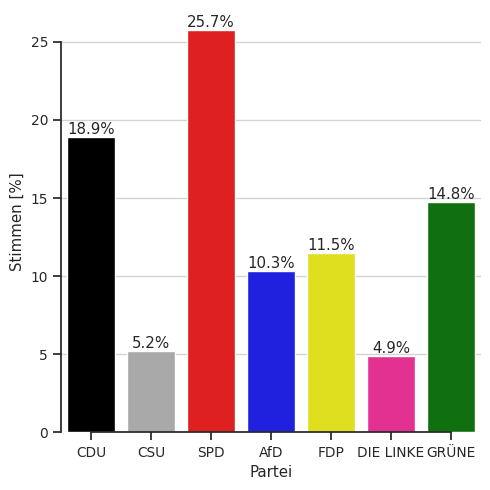

In [15]:
parteien = ['CDU', 'CSU', 'SPD', 'AfD', 'FDP', 'DIE LINKE', 'GRÜNE']

df_2nd = df_erg[(df_erg.Stimme == 2)
                & df_erg.Gruppenname.isin(parteien)]

bund = df_2nd[df_2nd.Gebietsart == 'Bund']
sns.set_context('notebook', font_scale=0.9)
bund
with sns.axes_style('ticks'):
    sns.catplot(data=bund, x = 'Gruppenname', y='Prozent', kind='bar', 
                order=['CDU', 'CSU', 'SPD', 'AfD', 'FDP', 'DIE LINKE', 'GRÜNE'], 
                palette=['black', 'darkgrey', 'red', 'blue', 'yellow', 'deeppink', 'green', 'grey'])
    fig = plt.gcf()
    fig.set(
        dpi=100
    )
    sns.despine(trim=True)
    ax = plt.gca()
    for i, party in enumerate(['CDU', 'CSU', 'SPD', 'AfD', 'FDP', 'DIE LINKE', 'GRÜNE']):
        perc = bund.set_index('Gruppenname').loc[party, 'Prozent']
        ax.text(i, .2 + perc, f'{perc:0.1f}%', ha='center')
    ax.set(
        xlabel='Partei',
        ylabel='Stimmen [%]'
    )
    ax.yaxis.grid(True, linestyle='-', color='lightgray')


## Get structural data

In [55]:
condition = (df_erg.Stimme == 2) & (df_erg.Gebietsart == 'Wahlkreis') & (df_erg.Gruppenname.isin(parteien))
df_2nd = df_erg[condition]
df_2nd['conservative'] = (df_2nd.Gruppenname.isin(['CDU', 'CSU', 'FDP', 'AfD']))
df_2nd

/var/folders/hm/1cg9rvbn6klcdp9c3gfd2mzm0000gn/T/ipykernel_89160/3080290454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2nd['conservative'] = (df_2nd.Gruppenname.isin(['CDU', 'CSU', 'FDP', 'AfD']))


Wahlart     Wahltag Gebietsart  Gebietsnummer            Gebietsname  \
1007       BT  26.09.2021  Wahlkreis              1  Flensburg – Schleswig   
1009       BT  26.09.2021  Wahlkreis              1  Flensburg – Schleswig   
1011       BT  26.09.2021  Wahlkreis              1  Flensburg – Schleswig   
1013       BT  26.09.2021  Wahlkreis              1  Flensburg – Schleswig   
1015       BT  26.09.2021  Wahlkreis              1  Flensburg – Schleswig   
...       ...         ...        ...            ...                    ...   
18785      BT  26.09.2021  Wahlkreis            299                Homburg   
18787      BT  26.09.2021  Wahlkreis            299                Homburg   
18789      BT  26.09.2021  Wahlkreis            299                Homburg   
18791      BT  26.09.2021  Wahlkreis            299                Homburg   
18813      BT  26.09.2021  Wahlkreis            299                Homburg   

      UegGebietsart  UegGebietsnummer Gruppenart Gruppenname  \
1007           LAND               1.0     Partei         CDU   
1009           LAND               1.0     Partei         SPD   
1011           LAND               1.0     Partei         FDP   
1013           LAND               1.0     Partei       GRÜNE   
1015           LAND               1.0     Partei         AfD   
...             ...               ...        ...         ...   
18785          LAND              10.0     Partei         SPD   
18787          LAND              10.0     Partei   DIE LINKE   
18789          LAND              10.0     Partei         AfD   
18791          LAND              10.0     Partei         FDP   
18813          LAND              10.0     Partei       GRÜNE   

       Gruppenreihenfolge  Stimme   Anzahl    Prozent  VorpAnzahl  \
1007                    1     2.0  36421.0  20.389643     58320.0   
1009                    2     2.0  45508.0  25.476837     40388.0   
1011                    3     2.0  19189.0  10.742617     18955.0   
1013                    4     2.0  33300.0  18.642407     22304.0   
1015                    5     2.0  10317.0   5.775787     11653.0   
...                   ...     ...      ...        ...         ...   
18785                   2     2.0  52091.0  37.238978     39729.0   
18787                   3     2.0   9247.0   6.610525     17773.0   
18789                   4     2.0  16068.0  11.486742     16745.0   
18791                   5     2.0  15719.0  11.237248     11096.0   
18813                  16     2.0      NaN        NaN      8109.0   

       VorpProzent  DiffProzent  DiffProzentPkt  Bemerkung  conservative  
1007     34.212302   -37.549726      -13.822659        NaN          True  
1009     23.692840    12.677033        1.783997        NaN         False  
1011     11.119585     1.234503       -0.376967        NaN          True  
1013     13.084211    49.300574        5.558196        NaN         False  
1015      6.836007   -11.464859       -1.060220        NaN          True  
...            ...          ...             ...        ...           ...  
18785    27.680892    31.115810        9.558086        NaN         False  
18787    12.383209   -47.971642       -5.772684        NaN         False  
18789    11.666957    -4.042998       -0.180214        NaN          True  
18791     7.731057    41.663663        3.506191        NaN          True  
18813     5.649887          NaN       -5.649887        NaN         False  

[1794 rows x 19 columns]

### 2. Aufsummierung, Extrahierung der Mehrheit, join mit Sturkturdaten

In [57]:
df_kon = df_2nd.groupby(['Gebietsnummer','Gebietsname', 'UegGebietsart', 'UegGebietsnummer', 'conservative'])['Prozent'].sum().reset_index()
df_kon

Gebietsnummer                        Gebietsname UegGebietsart  \
0                1              Flensburg – Schleswig          LAND   
1                1              Flensburg – Schleswig          LAND   
2                2  Nordfriesland – Dithmarschen Nord          LAND   
3                2  Nordfriesland – Dithmarschen Nord          LAND   
4                3       Steinburg – Dithmarschen Süd          LAND   
..             ...                                ...           ...   
593            297                          Saarlouis          LAND   
594            298                         St. Wendel          LAND   
595            298                         St. Wendel          LAND   
596            299                            Homburg          LAND   
597            299                            Homburg          LAND   

     UegGebietsnummer  conservative    Prozent  
0                 1.0         False  48.303989  
1                 1.0          True  36.908047  
2                 1.0         False  45.059488  
3                 1.0          True  43.469423  
4                 1.0         False  45.318225  
..                ...           ...        ...  
593              10.0          True  46.460497  
594              10.0         False  43.140288  
595              10.0          True  46.754044  
596              10.0         False  43.849503  
597              10.0          True  45.603110  

[598 rows x 6 columns]

In [59]:
df_maj = df_kon.sort_values('Prozent').drop_duplicates(['Gebietsnummer','Gebietsname', 'UegGebietsart', 'UegGebietsnummer'],keep='last').sort_values('Gebietsnummer').reset_index()
df_maj


index  Gebietsnummer                        Gebietsname UegGebietsart  \
0        0              1              Flensburg – Schleswig          LAND   
1        2              2  Nordfriesland – Dithmarschen Nord          LAND   
2        5              3       Steinburg – Dithmarschen Süd          LAND   
3        6              4              Rendsburg-Eckernförde          LAND   
4        8              5                               Kiel          LAND   
..     ...            ...                                ...           ...   
294    589            295           Zollernalb – Sigmaringen          LAND   
295    590            296                        Saarbrücken          LAND   
296    593            297                          Saarlouis          LAND   
297    595            298                         St. Wendel          LAND   
298    597            299                            Homburg          LAND   

     UegGebietsnummer  conservative    Prozent  
0                 1.0         False  48.303989  
1                 1.0         False  45.059488  
2                 1.0          True  46.360346  
3                 1.0         False  47.925818  
4                 1.0         False  60.526350  
..                ...           ...        ...  
294               8.0          True  57.865095  
295              10.0         False  47.710608  
296              10.0          True  46.460497  
297              10.0          True  46.754044  
298              10.0          True  45.603110  

[299 rows x 7 columns]

In [62]:
df_cls = df_maj.set_index('Gebietsnummer').join(df_struktur.set_index('Wahlkreis-Nr.'))
df_cls

index                        Gebietsname UegGebietsart  \
Gebietsnummer                                                           
1                  0              Flensburg – Schleswig          LAND   
2                  2  Nordfriesland – Dithmarschen Nord          LAND   
3                  5       Steinburg – Dithmarschen Süd          LAND   
4                  6              Rendsburg-Eckernförde          LAND   
5                  8                               Kiel          LAND   
...              ...                                ...           ...   
295              589           Zollernalb – Sigmaringen          LAND   
296              590                        Saarbrücken          LAND   
297              593                          Saarlouis          LAND   
298              595                         St. Wendel          LAND   
299              597                            Homburg          LAND   

               UegGebietsnummer  conservative    Prozent                Land  \
Gebietsnummer                                                                  
1                           1.0         False  48.303989  Schleswig-Holstein   
2                           1.0         False  45.059488  Schleswig-Holstein   
3                           1.0          True  46.360346  Schleswig-Holstein   
4                           1.0         False  47.925818  Schleswig-Holstein   
5                           1.0         False  60.526350  Schleswig-Holstein   
...                         ...           ...        ...                 ...   
295                         8.0          True  57.865095   Baden-Württemberg   
296                        10.0         False  47.710608            Saarland   
297                        10.0          True  46.460497            Saarland   
298                        10.0          True  46.754044            Saarland   
299                        10.0          True  45.603110            Saarland   

                                  Wahlkreis-Name  \
Gebietsnummer                                      
1                          Flensburg – Schleswig   
2              Nordfriesland – Dithmarschen Nord   
3                   Steinburg – Dithmarschen Süd   
4                          Rendsburg-Eckernförde   
5                                           Kiel   
...                                          ...   
295                     Zollernalb – Sigmaringen   
296                                  Saarbrücken   
297                                    Saarlouis   
298                                   St. Wendel   
299                                      Homburg   

               Gemeinden am 31.12.2019 (Anzahl)  Fläche am 31.12.2019 (km²)  \
Gebietsnummer                                                                 
1                                           126                      2124.3   
2                                           197                      2777.9   
3                                           178                      2000.0   
4                                           163                      2165.4   
5                                             3                       143.0   
...                                         ...                         ...   
295                                          40                      1656.3   
296                                           6                       325.7   
297                                          18                       893.2   
298                                          16                       802.0   
299                                          12                       550.2   

               ...  \
Gebietsnummer  ...   
1              ...   
2              ...   
3              ...   
4              ...   
5              ...   
...            ...   
295            ...   
296            ...   
297            ...   
298            ...   
299            ...   

               Sozialversicherun

In [63]:
unemployment = [e for e in df_cls.columns if e.startswith('Arbeitslosenquote')]
df_unemployment = df_cls[unemployment + ['conservative']].reset_index()

# Get all columns that start with "Arbeitslosen"
cols = [col for col in df_unemployment.columns if col.startswith('Arbeitslosen')]

df_long = df_unemployment.melt(id_vars=['conservative'], 
                     value_vars=unemployment, 
                     var_name='statistic', 
                     value_name='Percent Unemployed')
df_long

conservative                                         statistic  \
0            False        Arbeitslosenquote Februar 2021 - insgesamt   
1            False        Arbeitslosenquote Februar 2021 - insgesamt   
2             True        Arbeitslosenquote Februar 2021 - insgesamt   
3            False        Arbeitslosenquote Februar 2021 - insgesamt   
4            False        Arbeitslosenquote Februar 2021 - insgesamt   
...            ...                                               ...   
1490          True  Arbeitslosenquote Februar 2021 - 55 bis 64 Jahre   
1491         False  Arbeitslosenquote Februar 2021 - 55 bis 64 Jahre   
1492          True  Arbeitslosenquote Februar 2021 - 55 bis 64 Jahre   
1493          True  Arbeitslosenquote Februar 2021 - 55 bis 64 Jahre   
1494          True  Arbeitslosenquote Februar 2021 - 55 bis 64 Jahre   

      Percent Unemployed  
0                    7.0  
1                    6.5  
2                    6.4  
3                    4.8  
4                    8.4  
...                  ...  
1490                 4.8  
1491                 9.2  
1492                 5.9  
1493                 6.1  
1494                 7.2  

[1495 rows x 3 columns]

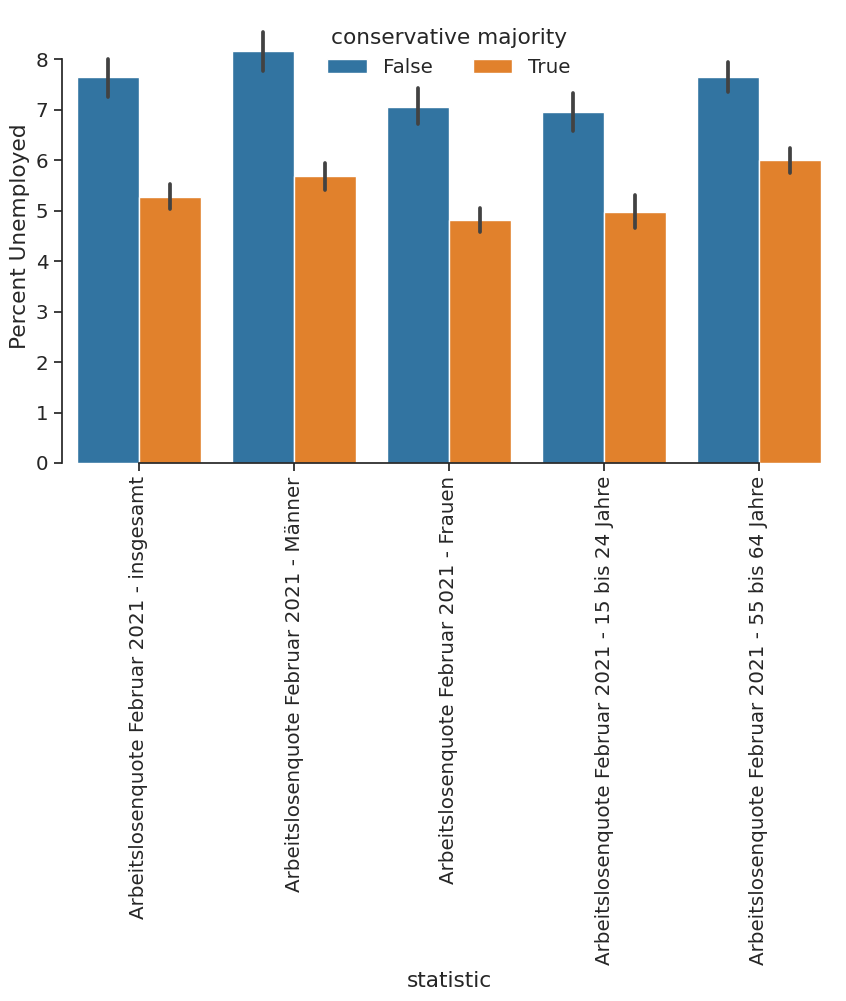

In [79]:
with sns.axes_style('ticks'):
    fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
    sns.set_context('notebook', font_scale=1.3)
    sns.barplot(data=df_long, x='statistic', y='Percent Unemployed', hue='conservative')
    sns.despine(trim=True)
    plt.xticks(rotation=90)
    plt.legend(ncol=2, title='conservative majority', frameon=False)
    

# Modeling

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import warnings
from tqdm.notebook import tqdm
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split

# selection = slice(51,-1) # slice(8, -1)
# selection = slice(8, -1)
selection = [i for i, c in enumerate(df_cls.columns) if c in ['Arbeitslosenquote Februar 2021 - insgesamt', 
                                                              'Empfänger/-innen von Leistungen nach SGB II  Oktober 2020 -  insgesamt (je 1000 EW)']]
# selection = [i for i, c in enumerate(df_cls.columns) if c in ['Arbeitslosenquote Februar 2021 - insgesamt']]

y = np.array(df_cls.conservative) * 1. # convert to 0/1
X = np.array(df_cls.iloc[:, selection])
xlabels= np.array(df_cls.columns[selection])

scaler = StandardScaler()
scaler.fit(X)
Xn = scaler.transform(X)


In [140]:
n_splits = 5

inner_cv = KFold(n_splits=n_splits, shuffle=True)
outer_cv = KFold(n_splits=n_splits, shuffle=True)
logreg = LogisticRegression(solver='liblinear')

p_grid = {'C':2**np.arange(-4,4.), 'penalty': ['l1', 'l2']}
scores = np.zeros(n_splits)
weights = []
fprs, tprs = [], []
with warnings.catch_warnings():
    for i, (idx_train, idx_test) in tqdm(enumerate(outer_cv.split(X)), total=n_splits):
        clf = GridSearchCV(estimator=logreg, param_grid=p_grid, cv=inner_cv)
        clf.fit(Xn[idx_train], y[idx_train])
        scores[i] = clf.best_estimator_.score(Xn[idx_test], y[idx_test])
        weights.append(clf.best_estimator_.coef_.flatten())
        y_scores = clf.best_estimator_.decision_function(Xn[idx_test])
        fpr, tpr, _ = roc_curve(y[idx_test], y_scores)
        fprs.append(fpr)
        tprs.append(tpr)
        print(clf.best_params_)
        
weights = np.vstack(weights)
print(f'Classifier test performance is {np.mean(scores):02f} +- {np.std(scores)/np.sqrt(n_splits):02f} (mean +- sem)')


  0%|          | 0/5 [00:00<?, ?it/s]

{'C': 4.0, 'penalty': 'l1'}
{'C': 2.0, 'penalty': 'l1'}
{'C': 0.5, 'penalty': 'l1'}
{'C': 4.0, 'penalty': 'l2'}
{'C': 2.0, 'penalty': 'l2'}
Classifier test performance is 0.772768 +- 0.018857 (mean +- sem)


### Plot the weights

In [141]:
features = np.min([10, len(xlabels)])

fig, ax = plt.subplots(figsize=(16, features/2))
locs = np.arange(len(xlabels))
w = weights.mean(axis=0)
we = weights.std(axis=0)/np.sqrt(n_splits)
idx = np.argsort(-np.abs(w))
idx = idx[:features]

bars = ax.barh(np.arange(features), w[idx], xerr=we[idx])
for wi, bi in zip(w[idx], bars):
    bi.set_color('r' if wi <0 else 'navy')
ax.set_yticks(np.arange(features))
ax.set_yticklabels(xlabels[idx], rotation=0);
ax.grid(True, linestyle=':')
sns.despine(trim=True)

In [167]:
x1, x2 = np.meshgrid(np.linspace(-2, 5, 100), np.linspace(-2, 5, 100))
X_grid = np.c_[x1.ravel(), x2.ravel()]
p =  clf.best_estimator_.predict_proba(X_grid)[:, 1].reshape(x1.shape)

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
    ax.pcolormesh(x1, x2, p, cmap='bwr_r', shading='auto', alpha=0.5)
    ax.scatter(Xn[:, 0], Xn[:, 1], c=y, cmap='bwr_r', s=25, edgecolor='k', lw=1)
    ax.set(
        xlabel=xlabels[0],
        ylabel=xlabels[1],
        aspect=1,
        xticks = np.arange(-2, 6),
        yticks = np.arange(-2, 6),
    )
    w = clf.best_estimator_.coef_.flatten()
    w /= np.linalg.norm(w)
    ax.arrow(0, 0, w[0], w[1], head_width=0.1, head_length=0.1, lw=2, fc='k', ec='k')
    ax.grid(True, linestyle=':')
    sns.despine(trim=True)

/var/folders/hm/1cg9rvbn6klcdp9c3gfd2mzm0000gn/T/ipykernel_89160/41856600.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(x1, x2, p, cmap='bwr_r', shading='auto', alpha=0.5)
